In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (8, 5)

In [4]:
sentiment = pd.read_csv(r"C:\Users\albin aby\Desktop\trade-sentiment-analysis\data\fear_greed_index.csv")
trades = pd.read_csv(r"C:\Users\albin aby\Desktop\trade-sentiment-analysis\data\historical_data.csv")

print("Sentiment shape:", sentiment.shape)
print("Trades shape:", trades.shape)

Sentiment shape: (2644, 4)
Trades shape: (211224, 16)


In [5]:
sentiment.info()
trades.info()

sentiment.isna().sum()
trades.isna().sum()

sentiment.duplicated().sum()
trades.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-nu

np.int64(0)

In [9]:
# convert date safely (handles DD-MM-YYYY and mixed formats)
sentiment['date'] = pd.to_datetime(
    sentiment['date'],
    dayfirst=True,
    errors='coerce'
).dt.date

# rename column to match analysis code
sentiment.rename(
    columns={'classification': 'Classification'},
    inplace=True
)

# optional: drop rows where date failed to parse
sentiment = sentiment.dropna(subset=['date'])

In [12]:
# ---- TRADES DATA ----
trades['Timestamp IST'] = pd.to_datetime(
    trades['Timestamp IST'],
    errors='coerce'
)

trades['date'] = trades['Timestamp IST'].dt.date
trades = trades.dropna(subset=['date'])

In [13]:
for col in trades.columns:
    if col.lower().replace(" ", "") in ["closedpnl", "closedpnL", "closedpnl"]:
        trades.rename(columns={col: "Closed Pnl"}, inplace=True)

In [14]:
print(sentiment[['date', 'Classification']].head())
print(trades[['date', 'Side', 'Closed Pnl']].head())

         date Classification
0  2018-01-02           Fear
1  2018-02-02   Extreme Fear
2  2018-03-02           Fear
3  2018-04-02   Extreme Fear
4  2018-05-02   Extreme Fear
         date Side  Closed Pnl
0  2024-02-12  BUY         0.0
1  2024-02-12  BUY         0.0
2  2024-02-12  BUY         0.0
3  2024-02-12  BUY         0.0
4  2024-02-12  BUY         0.0


In [15]:
print(
    "Sentiment range:",
    sentiment['date'].min(),
    "to",
    sentiment['date'].max()
)

print(
    "Trades range:",
    trades['date'].min(),
    "to",
    trades['date'].max()
)

Sentiment range: 2018-01-02 to 2025-12-04
Trades range: 2023-01-05 to 2025-12-04


In [16]:
trade_start = trades['date'].min()
trade_end = trades['date'].max()

sentiment_filtered = sentiment[
    (sentiment['date'] >= trade_start) &
    (sentiment['date'] <= trade_end)
]

print("Filtered sentiment shape:", sentiment_filtered.shape)

Filtered sentiment shape: (334, 4)


In [17]:
merged = trades.merge(
    sentiment_filtered[['date', 'Classification']],
    on='date',
    how='inner'
)

print("Merged shape:", merged.shape)
merged.head()

Merged shape: (79225, 18)


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed Pnl,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,Classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-02-12 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-02-12,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-02-12 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-02-12,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-02-12 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-02-12,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-02-12 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-02-12,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-02-12 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-02-12,Extreme Greed


In [18]:
daily_metrics = merged.groupby(
    ['Account', 'date', 'Classification']
).agg(
    daily_pnl=('Closed Pnl', 'sum'),
    trade_count=('Coin', 'count'),
    avg_trade_size_usd=('Size USD', 'mean')
).reset_index()

daily_metrics.head()

,Account,date,Classification,daily_pnl,trade_count,avg_trade_size_usd
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-06-12,Greed,-175611.000056,33,36736.362424
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,Extreme Greed,0.000000,177,5089.718249
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2025-01-03,Extreme Fear,9482.221441,45,2985.797556
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2025-02-02,Greed,76710.000000,10,185847.000000
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2025-03-02,Fear,101011.685664,839,23593.019857


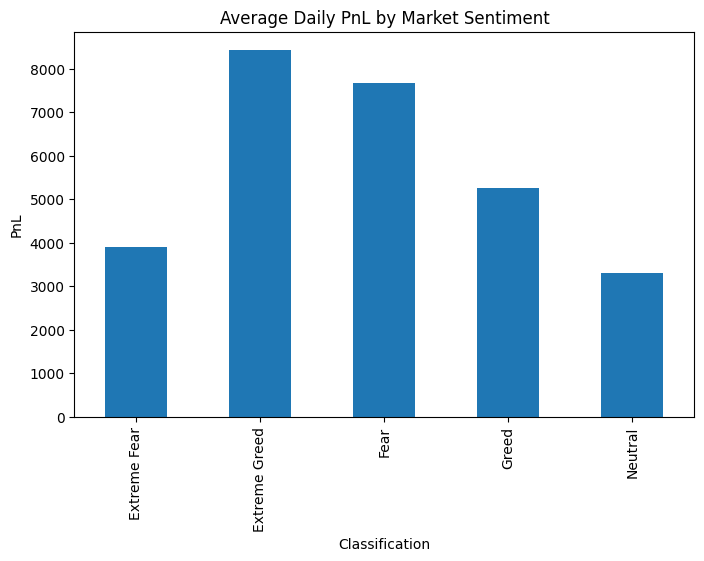

In [19]:
daily_metrics.groupby('Classification')['daily_pnl'].mean()


daily_metrics.groupby('Classification')['daily_pnl'].mean().plot(
    kind='bar',
    title='Average Daily PnL by Market Sentiment'
)
plt.ylabel("PnL")
plt.show()

In [20]:
daily_metrics.groupby('Classification')['trade_count'].mean()

Classification
Extreme Fear     146.520000
Extreme Greed     69.689441
Fear              88.445483
Greed             66.852041
Neutral           78.807692
Name: trade_count, dtype: float64

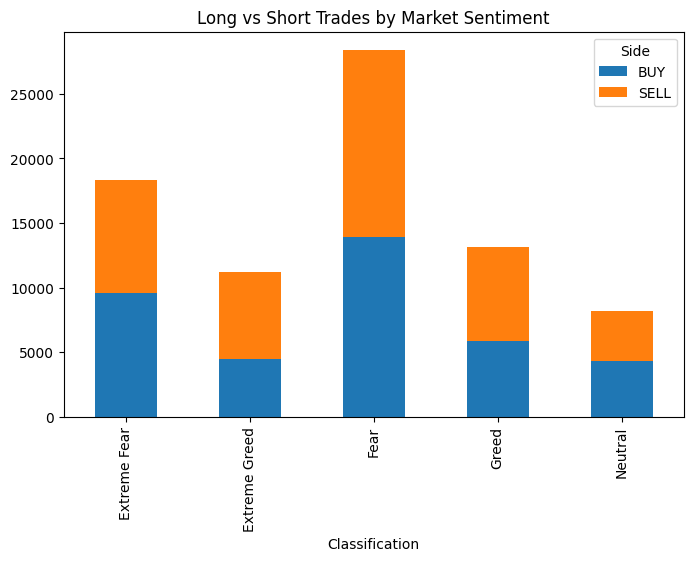

In [21]:
ls_ratio = merged.groupby(['Classification', 'Side']).size().unstack()
ls_ratio


ls_ratio.plot(
    kind='bar',
    stacked=True,
    title='Long vs Short Trades by Market Sentiment'
)
plt.show()

In [22]:
median_trades = daily_metrics['trade_count'].median()

daily_metrics['frequency_segment'] = np.where(
    daily_metrics['trade_count'] > median_trades,
    'Frequent',
    'Infrequent'
)

daily_metrics.groupby(
    ['Classification', 'frequency_segment']
)['daily_pnl'].mean()

Classification  frequency_segment
Extreme Fear    Frequent              5930.459107
                Infrequent            -432.769500
Extreme Greed   Frequent             15174.502632
                Infrequent            1922.398105
Fear            Frequent             14224.456935
                Infrequent            2398.147528
Greed           Frequent              9015.868677
                Infrequent            2070.640742
Neutral         Frequent              6337.556912
                Infrequent             156.670946
Name: daily_pnl, dtype: float64

In [ ]:
### Key Insights
1. Trading activity is higher during Greed periods compared to Fear.
2. Average daily PnL shows noticeable variation across sentiment regimes.
3. Frequent traders exhibit higher volatility, especially during Greed phases.

### Strategy Recommendations
1. Reduce risk exposure and position size during Fear periods.
2. Allow increased trade frequency during Greed periods only for active traders.